In [53]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
#sns.set()

In [54]:
df = pd.read_csv('data.csv')

## Classificação
### Decision Tree

In [55]:
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM') | (df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM') | (df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'MF'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

df['Simple Position'] = df.apply(simple_position, axis=1)
df = df.drop(['Position'], axis=1)

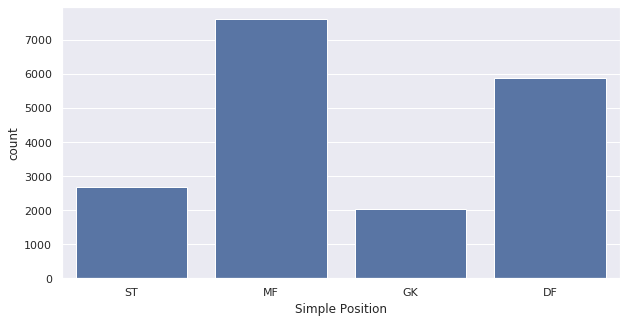

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x="Simple Position", data=df, color='b')
plt.show()

In [57]:
drop_cols = df.columns[22:48]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Jersey Number','Joined','Special',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club', 'Weak Foot',
               'Preferred Foot', 'Nationality', 'LS', 'Release Clause', 'Work Rate', 'International Reputation',
                'Skill Moves'], axis = 1)
df = df.dropna()

feature_cols = list(df.columns)

feature_cols.pop(feature_cols.index("Simple Position"))

'Simple Position'

In [58]:
feature_cols

['Age',
 'Overall',
 'Potential',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = le.fit_transform(df['Simple Position'])
X = df.drop(["Simple Position"], axis=1)
X = pd.get_dummies(X)

X = X.values

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
skf = StratifiedKFold(n_splits=20, shuffle=True)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new_train = scaler.fit_transform(X_train)

In [62]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [63]:
depth = []
for i in range(3,20): #tree depth
    clf = DecisionTreeClassifier(criterion="gini", max_depth=i)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.7659959715073423), (4, 0.7881768658086694), (5, 0.8364010498033421), (6, 0.8450801149607351), (7, 0.852797293602649), (8, 0.8559655993453704), (9, 0.8575505229583206), (10, 0.8564467675311853), (11, 0.8553430829326618), (12, 0.8507286620039876), (13, 0.8485245438829854), (14, 0.8448740494495899), (15, 0.8399139231500297), (16, 0.8401197980194206), (17, 0.8391564416341769), (18, 0.8355070386318454), (19, 0.8364698736960603)]


In [64]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7611570247933884


In [66]:
class_names = []
for i in range(len(list(set(y_test)))):
    pos = le.inverse_transform([i])[0]
    class_names.append(pos)
class_names

['DF', 'GK', 'MF', 'ST']

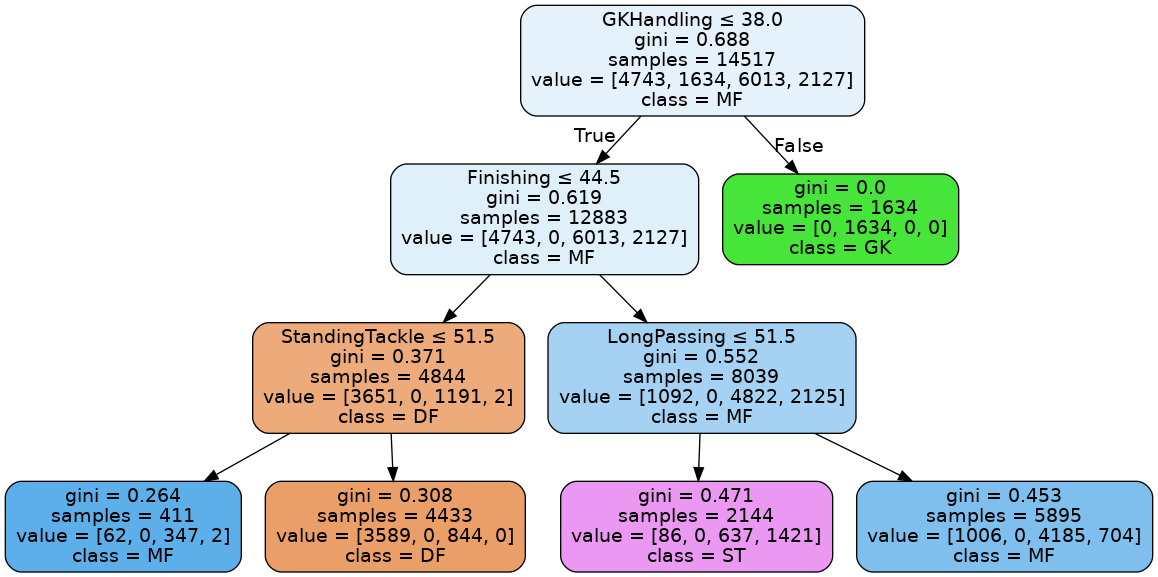

In [67]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [78]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

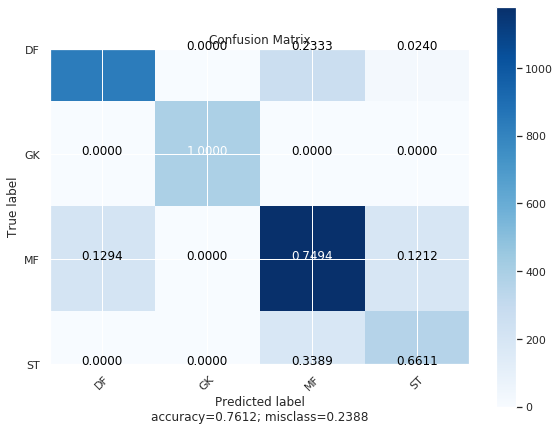

In [80]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm           = array,
                      normalize    = True,
                      target_names = class_names,
                      title        = "Confusion Matrix")

$\textbf{Parâmetros}$: foi utilizada a impureza de gini como métrica para avaliar a qualidade da árvore, a impureza de gini mede com que frequência  um elemento escolhido aleatoriamente do  conjunto seria incorretamente classificado se ele fosse rotulado aleatoriamente de acordo com a distribuição dos rótulos do subconjunto. Para facilitar a interpretação sem comprometer muito a acurácia,  limitamos a altura da árvore em 3.

$\textbf{Treino}$: Quebramos o conjunto de dados em 80\% treino e 20\% teste, além de, no treino, fazer a validação usando cross-validation com 5-folds. Já que os atletas estão razoavelmente bem distribuídos entre as classes, não foi necessário balancear o conjunto de treino.

$\textbf{Resultados}$: Obtivemos bons resultados, mesmo podando a árvore. Obteve-se uma acurácia média de 76\% no conjunto de validação, e 79\% no conjunto de teste. Como é possível observar na matriz de confusão, os goleiros são facilmente identificáveis, assim como os meias. A maior parte dos erros se concentra envolvendo atletas que são defensores ou atacantes, mas são classificados como meias. Isso se deve à grande diversidade de funções que os atletas de meio podem exercer, existindo atletas mais defensivos ou mais agressivos, ao invés de atletas "puramente" de meio, como ocorre na defesa e no ataque.